In [1]:
%pylab inline


Populating the interactive namespace from numpy and matplotlib


# Testing our Fourier Transform Implementation

We have improved our naiv Fourier Transform implementation by using the exact solutions
$$G(τ)=-\frac{1}{2} \quad \to \quad G(i ω) =\frac{1}{i ω}$$
to subtract the $\frac{1}{i \omega}$ factor, for which the Matsubara sum does not converge.

Testing these implementiations with known analytic solutions:
$$G(iω) = \frac{1}{iω +a} \quad \to \quad G(τ)=-e^{aτ}n_{FD}(a)$$

In [2]:
beta = 100.
import DMFTlib
DMFTlib.initialize(beta)

In [3]:
N=200
freq = DMFTlib.matsubara_freq(N)
tau = DMFTlib.matsubara_time(N)

In [4]:
a=0.2
G_omega_exact = 1. / ( 1j*freq + a )
G_tau_exact = -np.exp(a*tau)/(np.exp(a*beta)+1)
#FFT
G_tau_naiv = DMFTlib.matsubara_ifft_naiv(G_omega_exact)
G_tau_improved = DMFTlib.matsubara_ifft(G_omega_exact)
#IFFT
G_omega_naiv = DMFTlib.matsubara_fft_naiv(G_tau_exact)
G_omega_improved = DMFTlib.matsubara_fft(G_tau_exact)
#shift data for plot
G_omega_exact=np.fft.fftshift(G_omega_exact)
G_omega_naiv = np.fft.fftshift(G_omega_naiv)
G_omega_improved = np.fft.fftshift(G_omega_improved)
freq = np.fft.fftshift(freq)

/usr/lib/python3.5/site-packages/numpy/core/numeric.py:474: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


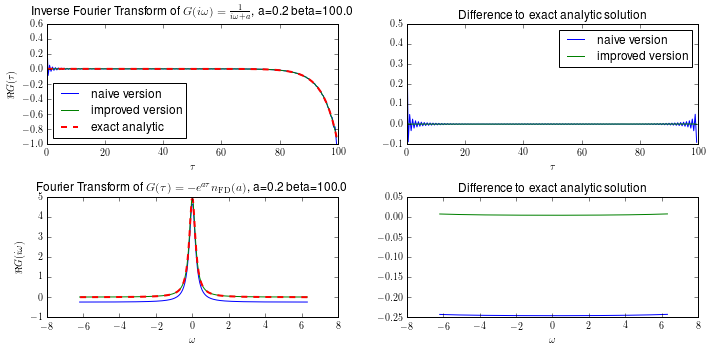

In [13]:
plt.rc('text', usetex=True)
plt.rc('font', family='sans-serif')
fig, axs = plt.subplots(ncols=2, nrows=2, figsize=(10,5))
ax= axs[0]
ax[0].set_title(r"Inverse Fourier Transform of $G(i \omega) = \frac{1}{i \omega +a}$" + ", a={} beta={}".format(a,beta))

ax[0].plot(tau,G_tau_naiv.real,label="naive version")
ax[0].plot(tau,np.real_if_close(G_tau_improved),label="improved version")
ax[0].plot(tau, G_tau_exact,"--",lw="2",label="exact analytic")
ax[0].set_xlabel(r"$\tau$")
ax[0].set_ylabel(r"$\Re G(\tau)$")
ax[0].legend(loc="lower left")
ax[1].plot(tau,G_tau_naiv.real-G_tau_exact,label="naive version")
ax[1].plot(tau,np.real_if_close(G_tau_improved)-G_tau_exact,label="improved version")
ax[1].legend(loc="upper right")
ax[1].set_xlabel(r"$\tau$")
ax[1].set_title("Difference to exact analytic solution")
ax = axs[1]
ax[0].set_title(r"Fourier Transform of $G(\tau)=-e^{a \tau}n_\mathrm{FD}(a)$" + ", a={} beta={}".format(a,beta))
ax[0].plot(freq,G_omega_naiv.real,label="naive version")
ax[0].plot(freq,G_omega_improved.real,label="improved version")
ax[0].plot(freq, G_omega_exact.real,"--",lw="2",label="exact analytic")
#ax[0].legend()
ax[0].set_xlabel("$\omega$")
ax[0].set_ylabel(r"$\Re{G(i \omega)}$")
ax[1].set_xlabel("$\omega$")
ax[1].plot(freq,G_omega_naiv.real-G_omega_exact.real,label="naive version")
ax[1].plot(freq,G_omega_improved.real-G_omega_exact.real,label="improved version")
#ax[1].legend()
ax[1].set_title("Difference to exact analytic solution")
fig.tight_layout()
plt.savefig("Matsubara_Fourier_transform_test.pdf",bbox_inches='tight')